# Embedding


In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense ,Embedding
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [3]:
corpus = ['ristorante pessimo',
         'piatto di pasta scondito',
         'pizza squisita, ci tornerò',
         'la pasta scotta e scondita',
         'miglior pizzeria in zona',
         'consigliato, pizza buona',
         'bravi. pizza molto buona.',
         'pasta cattiva. Sconsigliato']

y =['negativa','negativa','positiva','negativa','positiva','positiva','positiva','negativa']

In [4]:
tokenizer = Tokenizer(num_words= 25)
tokenizer.fit_on_texts(corpus)
vocabulary_size = len(tokenizer.word_index)+1
print('vocabulary size: {}'.format(vocabulary_size))

vocabulary size: 25


In [5]:
sequences = tokenizer.texts_to_sequences(corpus)
max_len = len(max(sequences, key=len))
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [6]:
print(padded_sequences)

[[ 0  0  0  4  5]
 [ 0  6  7  1  8]
 [ 0  2  9 10 11]
 [12  1 13 14 15]
 [ 0 16 17 18 19]
 [ 0  0 20  2  3]
 [ 0 21  2 22  3]
 [ 0  0  1 23 24]]


In [7]:
#Simple NN for embedding
model = Sequential()
model.add(Embedding(vocabulary_size, output_dim = 2, input_length = max_len))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 2)              50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',loss='mse',metrics=['acc']) 

In [9]:
embeddings = model.predict(padded_sequences)

1/1 [==============================] - 0s 60ms/step


In [10]:
embeddings.shape
#8 documents, 5 words for document, 2 element representation for each word

(8, 5, 2)

**Embedding for Document**

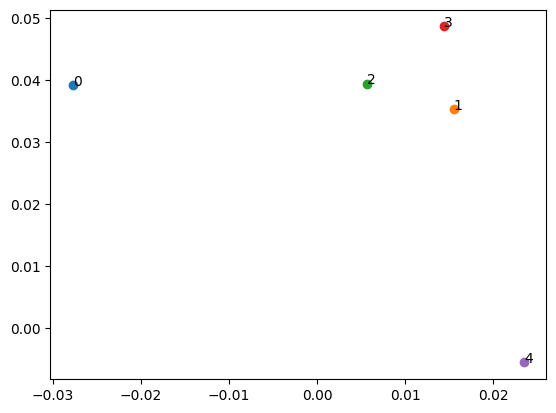

In [11]:
import matplotlib.pyplot as plt
#prendiamo il quarto documento
fig, ax = plt.subplots()
for i,word in enumerate(embeddings[2]):
    ax.scatter(word[0],word[1])
    ax.annotate(str(i), (word[0],word[1]))

**Embedding for each word**

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = np.asarray(y).astype('float32').reshape((-1,1))

In [13]:
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size,output_dim=2,input_length=max_len))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 2)              50        
                                                                 
 dense (Dense)               (None, 5, 1)              3         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
model.fit(padded_sequences, y,epochs=100,verbose = 0)

In [15]:
#weights of layer 0 are embeddings
embeddings = model.layers[0].get_weights()[0]
embeddings.shape

(25, 2)

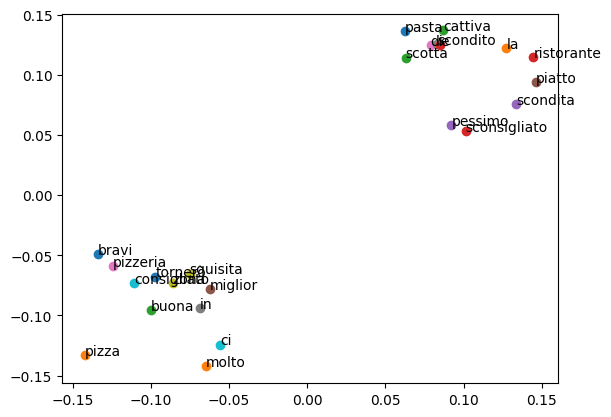

In [19]:
vocab = list(tokenizer.word_index.keys())
fig, ax = plt.subplots()
for i in range(1,len(embeddings)):
    e_x,e_y = embeddings[i]
    ax.scatter(e_x,e_y)
    ax.annotate(vocab[i-1], (e_x,e_y))